In [10]:
import pandas as pd
import numpy as np

names=['emotion','pixels','usage']

# Load inputs and targets from fer2013.csv (Google Colab)

Use one of the following 2 ways to load data into colab

## From Google Drive

In [ ]:
# if you are using google drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# you may need to change this file path
df=pd.read_csv('/content/drive/My Drive/project/fer2013/fer2013.csv',names=names, na_filter=False)
train_df = df[df['usage']=='Training']
validate_df = df[df['usage']=='PublicTest']
test_df = df[df['usage']=='PrivateTest']

## Upload data from Hard Drive

In [9]:
from google.colab import files
uploaded = files.upload()

Saving fer2013.csv to fer2013.csv


In [13]:
df = pd.read_csv('fer2013.csv')
train_df = df[df['Usage']=='Training']
validate_df = df[df['Usage']=='PublicTest']
test_df = df[df['Usage']=='PrivateTest']

# Running from Local (eg. with Jupyter)

In [ ]:
df = pd.read_csv('../data/raw/fer2013/fer2013.csv')
train_df = df[df['Usage']=='Training']
validate_df = df[df['Usage']=='PublicTest']
test_df = df[df['Usage']=='PrivateTest']

## Preprocess

In [14]:
from skimage.transform import resize
def load_from_df(df):
    imgs = df['pixels']
    t = df['emotion']
    inputs = []
    targets = []
    for i in imgs.keys():
        x = [int(p) for p in imgs[i].split()]
        x = np.reshape(x,(48,48))
        # resize_x = resize(x, (112, 112), preserve_range=True)
        y = [0 for i in range(7)]
        y[int(t[i])] = 1
        inputs.append(x)
        targets.append(y)
    inputs = np.array(inputs,dtype=np.float32)
    inputs = np.expand_dims(inputs,axis=3)
    inputs /= 255
    targets = np.array(targets, dtype=np.float32)
    return inputs, targets

In [15]:
v_inputs, v_targets = load_from_df(validate_df)
t_inputs, t_targets = load_from_df(test_df)
tr_inputs, tr_targets = load_from_df(train_df)

# Training

## Base model

In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

proto = Sequential()

proto.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu',input_shape=(48,48,1)))
proto.add(MaxPooling2D(pool_size=2))
proto.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
proto.add(MaxPooling2D(pool_size=2))
proto.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
proto.add(MaxPooling2D(pool_size=2))
proto.add(Flatten())
proto.add(Dense(256,activation='relu'))
proto.add(Dense(512,activation='relu'))
proto.add(Dense(7,activation='softmax'))

proto.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_93 (Conv2D)           (None, 48, 48, 32)        160       
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 24, 24, 64)        8256      
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 12, 12, 128)       32896     
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_31 (Flatten)         (None, 4608)            

Compile

In [ ]:
proto.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train model

In [ ]:
from keras.callbacks import ModelCheckpoint

epoch = 50

checkpointer = ModelCheckpoint(filepath='mycnn_prototype.hdf5',verbose=1,save_best_only= True)

hist = proto.fit(tr_inputs, tr_targets , 
          validation_data=(v_inputs , v_targets),
          epochs= epoch, batch_size=128, callbacks=[checkpointer], verbose=1)

Epoch 1/50
222/225 [============================>.] - ETA: 0s - loss: 1.7084 - accuracy: 0.3104
Epoch 00001: val_loss improved from inf to 1.58743, saving model to mycnn_prototype.hdf5
225/225 [==============================] - 3s 11ms/step - loss: 1.7068 - accuracy: 0.3110 - val_loss: 1.5874 - val_accuracy: 0.3792
Epoch 2/50
221/225 [============================>.] - ETA: 0s - loss: 1.4923 - accuracy: 0.4227
Epoch 00002: val_loss improved from 1.58743 to 1.40583, saving model to mycnn_prototype.hdf5
225/225 [==============================] - 2s 11ms/step - loss: 1.4910 - accuracy: 0.4232 - val_loss: 1.4058 - val_accuracy: 0.4539
Epoch 3/50
223/225 [============================>.] - ETA: 0s - loss: 1.3540 - accuracy: 0.4753
Epoch 00003: val_loss improved from 1.40583 to 1.32423, saving model to mycnn_prototype.hdf5
225/225 [==============================] - 2s 11ms/step - loss: 1.3540 - accuracy: 0.4751 - val_loss: 1.3242 - val_accuracy: 0.4887
Epoch 4/50
222/225 [=====================

In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

proto_dropout = Sequential()

proto_dropout.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu',input_shape=(48,48,1)))
proto_dropout.add(MaxPooling2D(pool_size=2))
proto_dropout.add(Dropout(0.2))
proto_dropout.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
proto_dropout.add(MaxPooling2D(pool_size=2))
proto_dropout.add(Dropout(0.2))
proto_dropout.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
proto_dropout.add(MaxPooling2D(pool_size=2))
proto_dropout.add(Dropout(0.2))
proto_dropout.add(Flatten())
proto_dropout.add(Dense(256,activation='relu'))
proto_dropout.add(Dropout(0.2))
proto_dropout.add(Dense(512,activation='relu'))
proto_dropout.add(Dropout(0.2))
proto_dropout.add(Dense(7,activation='softmax'))

# proto_dropout.summary()

In [ ]:
proto_dropout.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

epoch = 50

checkpointer_dropout = ModelCheckpoint(filepath='mycnn_dropout.hdf5',verbose=1,save_best_only= True)

hist_dropout = proto_dropout.fit(tr_inputs, tr_targets , 
          validation_data=(v_inputs , v_targets),
          epochs= epoch, batch_size=128, callbacks=[checkpointer_dropout], verbose=1)

Epoch 1/50
220/225 [============================>.] - ETA: 0s - loss: 1.7872 - accuracy: 0.2627
Epoch 00001: val_loss improved from inf to 1.69202, saving model to mycnn_dropout.hdf5
225/225 [==============================] - 3s 13ms/step - loss: 1.7863 - accuracy: 0.2634 - val_loss: 1.6920 - val_accuracy: 0.3525
Epoch 2/50
225/225 [==============================] - ETA: 0s - loss: 1.6160 - accuracy: 0.3665
Epoch 00002: val_loss improved from 1.69202 to 1.51261, saving model to mycnn_dropout.hdf5
225/225 [==============================] - 3s 12ms/step - loss: 1.6160 - accuracy: 0.3665 - val_loss: 1.5126 - val_accuracy: 0.4249
Epoch 3/50
225/225 [==============================] - ETA: 0s - loss: 1.5066 - accuracy: 0.4165
Epoch 00003: val_loss improved from 1.51261 to 1.42536, saving model to mycnn_dropout.hdf5
225/225 [==============================] - 3s 12ms/step - loss: 1.5066 - accuracy: 0.4165 - val_loss: 1.4254 - val_accuracy: 0.4450
Epoch 4/50
222/225 [===========================

In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

proto_batchnorm = Sequential()

proto_batchnorm.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu',input_shape=(48,48,1)))
proto_batchnorm.add(BatchNormalization())
proto_batchnorm.add(MaxPooling2D(pool_size=2))
proto_batchnorm.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
proto_batchnorm.add(BatchNormalization())
proto_batchnorm.add(MaxPooling2D(pool_size=2))
proto_batchnorm.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
proto_batchnorm.add(BatchNormalization())
proto_batchnorm.add(MaxPooling2D(pool_size=2))
proto_batchnorm.add(Flatten())
proto_batchnorm.add(Dense(256,activation='relu'))
proto_batchnorm.add(BatchNormalization())
proto_batchnorm.add(Dense(512,activation='relu'))
proto_batchnorm.add(BatchNormalization())
proto_batchnorm.add(Dense(7,activation='softmax'))

# proto_batchnorm.summary()

In [ ]:
proto_batchnorm.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

epoch = 50

checkpointer_batchnorm = ModelCheckpoint(filepath='mycnn_batchnorm.hdf5',verbose=1,save_best_only= True)

hist_batchnorm = proto_batchnorm.fit(tr_inputs, tr_targets , 
          validation_data=(v_inputs , v_targets),
          epochs= epoch, batch_size=128, callbacks=[checkpointer_batchnorm], verbose=1)

Epoch 1/50
223/225 [============================>.] - ETA: 0s - loss: 1.5635 - accuracy: 0.4201
Epoch 00001: val_loss improved from inf to 3.56709, saving model to mycnn_batchnorm.hdf5
225/225 [==============================] - 3s 15ms/step - loss: 1.5623 - accuracy: 0.4207 - val_loss: 3.5671 - val_accuracy: 0.1833
Epoch 2/50
224/225 [============================>.] - ETA: 0s - loss: 1.2150 - accuracy: 0.5431
Epoch 00002: val_loss improved from 3.56709 to 2.04593, saving model to mycnn_batchnorm.hdf5
225/225 [==============================] - 3s 14ms/step - loss: 1.2154 - accuracy: 0.5430 - val_loss: 2.0459 - val_accuracy: 0.2329
Epoch 3/50
224/225 [============================>.] - ETA: 0s - loss: 1.0368 - accuracy: 0.6148
Epoch 00003: val_loss improved from 2.04593 to 1.57881, saving model to mycnn_batchnorm.hdf5
225/225 [==============================] - 3s 14ms/step - loss: 1.0366 - accuracy: 0.6148 - val_loss: 1.5788 - val_accuracy: 0.4695
Epoch 4/50
223/225 [=====================

In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

proto_both = Sequential()

proto_both.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu',input_shape=(48,48,1)))
proto_both.add(BatchNormalization())
proto_both.add(MaxPooling2D(pool_size=2))
proto_both.add(Dropout(0.2))
proto_both.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
proto_both.add(BatchNormalization())
proto_both.add(MaxPooling2D(pool_size=2))
proto_both.add(Dropout(0.2))
proto_both.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
proto_both.add(BatchNormalization())
proto_both.add(MaxPooling2D(pool_size=2))
proto_both.add(Dropout(0.2))
proto_both.add(Flatten())
proto_both.add(Dense(256,activation='relu'))
proto_both.add(BatchNormalization())
proto_both.add(Dropout(0.2))
proto_both.add(Dense(512,activation='relu'))
proto_both.add(BatchNormalization())
proto_both.add(Dropout(0.2))
proto_both.add(Dense(7,activation='softmax'))


In [ ]:
proto_both.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

epoch = 50

checkpointer_both = ModelCheckpoint(filepath='mycnn_both.hdf5',verbose=1,save_best_only= True)

hist_both = proto_both.fit(tr_inputs, tr_targets , 
          validation_data=(v_inputs , v_targets),
          epochs= epoch, batch_size=128, callbacks=[checkpointer_both], verbose=1)

Epoch 1/50
224/225 [============================>.] - ETA: 0s - loss: 1.9237 - accuracy: 0.3055
Epoch 00001: val_loss improved from inf to 2.34057, saving model to mycnn_both.hdf5
225/225 [==============================] - 4s 16ms/step - loss: 1.9235 - accuracy: 0.3055 - val_loss: 2.3406 - val_accuracy: 0.1691
Epoch 2/50
221/225 [============================>.] - ETA: 0s - loss: 1.5567 - accuracy: 0.4128
Epoch 00002: val_loss improved from 2.34057 to 1.65208, saving model to mycnn_both.hdf5
225/225 [==============================] - 3s 15ms/step - loss: 1.5551 - accuracy: 0.4132 - val_loss: 1.6521 - val_accuracy: 0.3647
Epoch 3/50
221/225 [============================>.] - ETA: 0s - loss: 1.4003 - accuracy: 0.4687
Epoch 00003: val_loss improved from 1.65208 to 1.40666, saving model to mycnn_both.hdf5
225/225 [==============================] - 3s 15ms/step - loss: 1.4001 - accuracy: 0.4687 - val_loss: 1.4067 - val_accuracy: 0.4525
Epoch 4/50
225/225 [==============================] - ET

In [ ]:
from keras.models import load_model
loaded = load_model("mycnn_prototype.hdf5")
scores = loaded.evaluate(t_inputs, t_targets)
print(scores[1])

loaded = load_model("mycnn_dropout.hdf5")
scores = loaded.evaluate(t_inputs, t_targets)
print(scores[1])

loaded = load_model("mycnn_batchnorm.hdf5")
scores = loaded.evaluate(t_inputs, t_targets)
print(scores[1])

loaded = load_model("mycnn_both.hdf5")
scores = loaded.evaluate(t_inputs, t_targets)
print(scores[1])

113/113 [==============================] - 0s 3ms/step - loss: 1.2049 - accuracy: 0.5380
0.5380328893661499
113/113 [==============================] - 0s 3ms/step - loss: 1.1286 - accuracy: 0.5620
0.5619949698448181
113/113 [==============================] - 0s 3ms/step - loss: 1.3694 - accuracy: 0.5138
0.5137921571731567
113/113 [==============================] - 0s 3ms/step - loss: 1.1412 - accuracy: 0.5812
0.5812203884124756


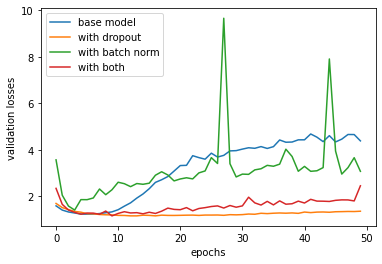

Text(0, 0.5, 'validation accuracy')

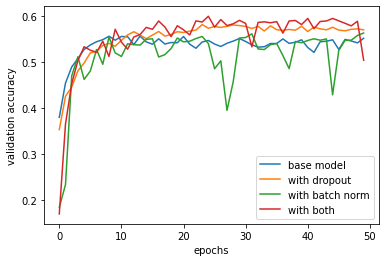

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['val_loss'], label='base model')
plt.plot(hist_dropout.history['val_loss'], label='with dropout')
plt.plot(hist_batchnorm.history['val_loss'], label='with batch norm')
plt.plot(hist_both.history['val_loss'], label='with both')

plt.legend(loc="upper left")
plt.xlabel("epochs")
plt.ylabel("validation losses")
plt.show()

plt.clf()
plt.plot(hist.history['val_accuracy'], label='base model')
plt.plot(hist_dropout.history['val_accuracy'], label='with dropout')
plt.plot(hist_batchnorm.history['val_accuracy'], label='with batch norm')
plt.plot(hist_both.history['val_accuracy'], label='with both')
plt.legend(loc="lower right")
plt.xlabel("epochs")
plt.ylabel("validation accuracy")


## Test dropout

In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

dropout1 = Sequential()

dropout1.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu',input_shape=(48,48,1)))
dropout1.add(BatchNormalization())
dropout1.add(MaxPooling2D(pool_size=2))
dropout1.add(Dropout(0.1))
dropout1.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
dropout1.add(BatchNormalization())
dropout1.add(MaxPooling2D(pool_size=2))
dropout1.add(Dropout(0.1))
dropout1.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
dropout1.add(BatchNormalization())
dropout1.add(MaxPooling2D(pool_size=2))
dropout1.add(Dropout(0.1))
dropout1.add(Flatten())
dropout1.add(Dense(256,activation='relu'))
dropout1.add(BatchNormalization())
dropout1.add(Dropout(0.1))
dropout1.add(Dense(512,activation='relu'))
dropout1.add(BatchNormalization())
dropout1.add(Dropout(0.1))
dropout1.add(Dense(7,activation='softmax'))

In [ ]:
dropout1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

epoch = 100

checkpointer_dropout1 = ModelCheckpoint(filepath='dropout1.hdf5',verbose=1,save_best_only= True)

hist_dropout1 = dropout1.fit(tr_inputs, tr_targets , 
          validation_data=(v_inputs , v_targets),
          epochs= epoch, batch_size=128, callbacks=[checkpointer_dropout1], verbose=1)

Epoch 1/100
222/225 [============================>.] - ETA: 0s - loss: 1.7739 - accuracy: 0.3484
Epoch 00001: val_loss improved from inf to 2.15136, saving model to dropout1.hdf5
225/225 [==============================] - 4s 16ms/step - loss: 1.7718 - accuracy: 0.3490 - val_loss: 2.1514 - val_accuracy: 0.1725
Epoch 2/100
221/225 [============================>.] - ETA: 0s - loss: 1.4394 - accuracy: 0.4533
Epoch 00002: val_loss improved from 2.15136 to 1.58176, saving model to dropout1.hdf5
225/225 [==============================] - 3s 15ms/step - loss: 1.4376 - accuracy: 0.4536 - val_loss: 1.5818 - val_accuracy: 0.3801
Epoch 3/100
221/225 [============================>.] - ETA: 0s - loss: 1.2891 - accuracy: 0.5104
Epoch 00003: val_loss improved from 1.58176 to 1.33263, saving model to dropout1.hdf5
225/225 [==============================] - 3s 15ms/step - loss: 1.2897 - accuracy: 0.5105 - val_loss: 1.3326 - val_accuracy: 0.4879
Epoch 4/100
221/225 [============================>.] - ETA:

In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

dropout2 = Sequential()

dropout2.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu',input_shape=(48,48,1)))
dropout2.add(BatchNormalization())
dropout2.add(MaxPooling2D(pool_size=2))
dropout2.add(Dropout(0.2))
dropout2.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
dropout2.add(BatchNormalization())
dropout2.add(MaxPooling2D(pool_size=2))
dropout2.add(Dropout(0.2))
dropout2.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
dropout2.add(BatchNormalization())
dropout2.add(MaxPooling2D(pool_size=2))
dropout2.add(Dropout(0.2))
dropout2.add(Flatten())
dropout2.add(Dense(256,activation='relu'))
dropout2.add(BatchNormalization())
dropout2.add(Dropout(0.2))
dropout2.add(Dense(512,activation='relu'))
dropout2.add(BatchNormalization())
dropout2.add(Dropout(0.2))
dropout2.add(Dense(7,activation='softmax'))


In [ ]:
dropout2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

epoch = 100

checkpointer_dropout2 = ModelCheckpoint(filepath='dropout2.hdf5',verbose=1,save_best_only= True)

hist_dropout2 = dropout2.fit(tr_inputs, tr_targets , 
          validation_data=(v_inputs , v_targets),
          epochs= epoch, batch_size=128, callbacks=[checkpointer_dropout2], verbose=1)

Epoch 1/100
222/225 [============================>.] - ETA: 0s - loss: 1.8995 - accuracy: 0.3119
Epoch 00001: val_loss improved from inf to 3.05499, saving model to dropout2.hdf5
225/225 [==============================] - 4s 16ms/step - loss: 1.8966 - accuracy: 0.3126 - val_loss: 3.0550 - val_accuracy: 0.2494
Epoch 2/100
221/225 [============================>.] - ETA: 0s - loss: 1.5336 - accuracy: 0.4180
Epoch 00002: val_loss improved from 3.05499 to 2.06833, saving model to dropout2.hdf5
225/225 [==============================] - 3s 15ms/step - loss: 1.5336 - accuracy: 0.4179 - val_loss: 2.0683 - val_accuracy: 0.2694
Epoch 3/100
221/225 [============================>.] - ETA: 0s - loss: 1.3929 - accuracy: 0.4681
Epoch 00003: val_loss improved from 2.06833 to 1.47347, saving model to dropout2.hdf5
225/225 [==============================] - 3s 15ms/step - loss: 1.3935 - accuracy: 0.4680 - val_loss: 1.4735 - val_accuracy: 0.4536
Epoch 4/100
221/225 [============================>.] - ETA:

In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

dropout3 = Sequential()

dropout3.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu',input_shape=(48,48,1)))
dropout3.add(BatchNormalization())
dropout3.add(MaxPooling2D(pool_size=2))
dropout3.add(Dropout(0.3))
dropout3.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
dropout3.add(BatchNormalization())
dropout3.add(MaxPooling2D(pool_size=2))
dropout3.add(Dropout(0.3))
dropout3.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
dropout3.add(BatchNormalization())
dropout3.add(MaxPooling2D(pool_size=2))
dropout3.add(Dropout(0.3))
dropout3.add(Flatten())
dropout3.add(Dense(256,activation='relu'))
dropout3.add(BatchNormalization())
dropout3.add(Dropout(0.3))
dropout3.add(Dense(512,activation='relu'))
dropout3.add(BatchNormalization())
dropout3.add(Dropout(0.3))
dropout3.add(Dense(7,activation='softmax'))



In [ ]:
from keras.optimizers import Adam

dropout3.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

epoch = 100

checkpointer_dropout3 = ModelCheckpoint(filepath='dropout3.hdf5',verbose=1,save_best_only= True)

hist_dropout3 = dropout3.fit(tr_inputs, tr_targets , 
          validation_data=(v_inputs , v_targets),
          epochs= epoch, batch_size=128, callbacks=[checkpointer_dropout3], verbose=1)

Epoch 1/100
222/225 [============================>.] - ETA: 0s - loss: 2.0384 - accuracy: 0.2758
Epoch 00001: val_loss improved from inf to 5.50062, saving model to dropout3.hdf5
225/225 [==============================] - 4s 16ms/step - loss: 2.0348 - accuracy: 0.2767 - val_loss: 5.5006 - val_accuracy: 0.1156
Epoch 2/100
225/225 [==============================] - ETA: 0s - loss: 1.6470 - accuracy: 0.3767
Epoch 00002: val_loss improved from 5.50062 to 3.95179, saving model to dropout3.hdf5
225/225 [==============================] - 3s 15ms/step - loss: 1.6470 - accuracy: 0.3767 - val_loss: 3.9518 - val_accuracy: 0.1808
Epoch 3/100
225/225 [==============================] - ETA: 0s - loss: 1.4994 - accuracy: 0.4256
Epoch 00003: val_loss improved from 3.95179 to 1.54345, saving model to dropout3.hdf5
225/225 [==============================] - 3s 15ms/step - loss: 1.4994 - accuracy: 0.4256 - val_loss: 1.5435 - val_accuracy: 0.4099
Epoch 4/100
221/225 [============================>.] - ETA:

In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

dropout4 = Sequential()

dropout4.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu',input_shape=(48,48,1)))
dropout4.add(BatchNormalization())
dropout4.add(MaxPooling2D(pool_size=2))
dropout4.add(Dropout(0.4))
dropout4.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
dropout4.add(BatchNormalization())
dropout4.add(MaxPooling2D(pool_size=2))
dropout4.add(Dropout(0.4))
dropout4.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
dropout4.add(BatchNormalization())
dropout4.add(MaxPooling2D(pool_size=2))
dropout4.add(Dropout(0.4))
dropout4.add(Flatten())
dropout4.add(Dense(256,activation='relu'))
dropout4.add(BatchNormalization())
dropout4.add(Dropout(0.4))
dropout4.add(Dense(512,activation='relu'))
dropout4.add(BatchNormalization())
dropout4.add(Dropout(0.4))
dropout4.add(Dense(7,activation='softmax'))

In [ ]:
from keras.optimizers import Adam

dropout4.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

epoch = 100

checkpointer_dropout4 = ModelCheckpoint(filepath='dropout4.hdf5',verbose=1,save_best_only= True)

hist_dropout4 = dropout4.fit(tr_inputs, tr_targets , 
          validation_data=(v_inputs , v_targets),
          epochs= epoch, batch_size=128, callbacks=[checkpointer_dropout4], verbose=1)

Epoch 1/100
222/225 [============================>.] - ETA: 0s - loss: 2.1900 - accuracy: 0.2356
Epoch 00001: val_loss improved from inf to 6.89517, saving model to dropout4.hdf5
225/225 [==============================] - 4s 16ms/step - loss: 2.1872 - accuracy: 0.2355 - val_loss: 6.8952 - val_accuracy: 0.2494
Epoch 2/100
225/225 [==============================] - ETA: 0s - loss: 1.7561 - accuracy: 0.3317
Epoch 00002: val_loss improved from 6.89517 to 2.59276, saving model to dropout4.hdf5
225/225 [==============================] - 3s 15ms/step - loss: 1.7561 - accuracy: 0.3317 - val_loss: 2.5928 - val_accuracy: 0.1758
Epoch 3/100
225/225 [==============================] - ETA: 0s - loss: 1.6141 - accuracy: 0.3787
Epoch 00003: val_loss improved from 2.59276 to 1.69450, saving model to dropout4.hdf5
225/225 [==============================] - 3s 15ms/step - loss: 1.6141 - accuracy: 0.3787 - val_loss: 1.6945 - val_accuracy: 0.3915
Epoch 4/100
223/225 [============================>.] - ETA:

In [ ]:
from keras.models import load_model
loaded = load_model("dropout1.hdf5")
scores = loaded.evaluate(t_inputs, t_targets)
print(scores[1])

loaded = load_model("dropout2.hdf5")
scores = loaded.evaluate(t_inputs, t_targets)
print(scores[1])

loaded = load_model("dropout3.hdf5")
scores = loaded.evaluate(t_inputs, t_targets)
print(scores[1])

loaded = load_model("dropout4.hdf5")
scores = loaded.evaluate(t_inputs, t_targets)
print(scores[1])

113/113 [==============================] - 0s 3ms/step - loss: 1.2335 - accuracy: 0.5478
0.5477849245071411
113/113 [==============================] - 0s 3ms/step - loss: 1.1249 - accuracy: 0.5846
0.5845639705657959
113/113 [==============================] - 0s 3ms/step - loss: 1.1172 - accuracy: 0.6010
0.6010030508041382
113/113 [==============================] - 0s 3ms/step - loss: 1.0703 - accuracy: 0.5960
0.5959877371788025


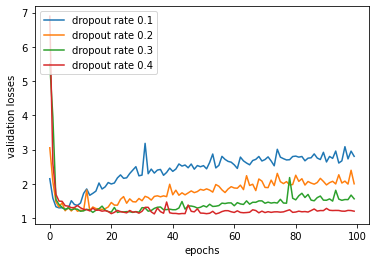

Text(0, 0.5, 'validation accuracy')

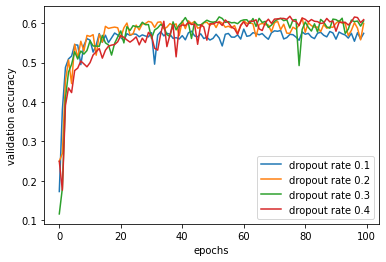

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist_dropout1.history['val_loss'], label='dropout rate 0.1')
plt.plot(hist_dropout2.history['val_loss'], label='dropout rate 0.2')
plt.plot(hist_dropout3.history['val_loss'], label='dropout rate 0.3')
plt.plot(hist_dropout4.history['val_loss'], label='dropout rate 0.4')

plt.legend(loc="upper left")
plt.xlabel("epochs")
plt.ylabel("validation losses")
plt.show()

plt.clf()
plt.plot(hist_dropout1.history['val_accuracy'], label='dropout rate 0.1')
plt.plot(hist_dropout2.history['val_accuracy'], label='dropout rate 0.2')
plt.plot(hist_dropout3.history['val_accuracy'], label='dropout rate 0.3')
plt.plot(hist_dropout4.history['val_accuracy'], label='dropout rate 0.4')
plt.legend(loc="lower right")
plt.xlabel("epochs")
plt.ylabel("validation accuracy")

In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

dropoutf = Sequential()

dropoutf.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu',input_shape=(48,48,1)))
dropoutf.add(BatchNormalization())
dropoutf.add(MaxPooling2D(pool_size=2))
dropoutf.add(Dropout(0.35))
dropoutf.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
dropoutf.add(BatchNormalization())
dropoutf.add(MaxPooling2D(pool_size=2))
dropoutf.add(Dropout(0.35))
dropoutf.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
dropoutf.add(BatchNormalization())
dropoutf.add(MaxPooling2D(pool_size=2))
dropoutf.add(Dropout(0.35))
dropoutf.add(Flatten())
dropoutf.add(Dense(256,activation='relu'))
dropoutf.add(BatchNormalization())
dropoutf.add(Dropout(0.35))
dropoutf.add(Dense(512,activation='relu'))
dropoutf.add(BatchNormalization())
dropoutf.add(Dropout(0.35))
dropoutf.add(Dense(7,activation='softmax'))

In [ ]:
from keras.optimizers import Adam

dropoutf.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

epoch = 100

checkpointer_dropoutf = ModelCheckpoint(filepath='dropoutf.hdf5',verbose=1,save_best_only= True)

hist_dropoutf = dropoutf.fit(tr_inputs, tr_targets , 
          validation_data=(v_inputs , v_targets),
          epochs= epoch, batch_size=128, callbacks=[checkpointer_dropoutf], verbose=1)

Epoch 1/100
223/225 [============================>.] - ETA: 0s - loss: 2.0981 - accuracy: 0.2637
Epoch 00001: val_loss improved from inf to 3.81051, saving model to dropoutf.hdf5
225/225 [==============================] - 4s 16ms/step - loss: 2.0962 - accuracy: 0.2641 - val_loss: 3.8105 - val_accuracy: 0.2494
Epoch 2/100
221/225 [============================>.] - ETA: 0s - loss: 1.6941 - accuracy: 0.3539
Epoch 00002: val_loss improved from 3.81051 to 2.56195, saving model to dropoutf.hdf5
225/225 [==============================] - 3s 15ms/step - loss: 1.6929 - accuracy: 0.3545 - val_loss: 2.5619 - val_accuracy: 0.2371
Epoch 3/100
221/225 [============================>.] - ETA: 0s - loss: 1.5492 - accuracy: 0.4055
Epoch 00003: val_loss improved from 2.56195 to 1.72378, saving model to dropoutf.hdf5
225/225 [==============================] - 3s 15ms/step - loss: 1.5489 - accuracy: 0.4056 - val_loss: 1.7238 - val_accuracy: 0.3792
Epoch 4/100
221/225 [============================>.] - ETA:

In [ ]:
loaded = load_model("dropoutf.hdf5")
scores = loaded.evaluate(t_inputs, t_targets)
print(scores[1])

113/113 [==============================] - 0s 4ms/step - loss: 1.0920 - accuracy: 0.6063
0.6062970161437988


## Test kernel number and neuron number



In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from keras import layers

model = Sequential()
model.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu',input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.35))
model.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.35))
model.add(Conv2D(filters=256,kernel_size=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.35))
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.35))
model.add(Dense(7,activation='softmax'))
# model.summary()

In [ ]:
from keras.optimizers import Adam
import keras
opt = Adam(lr=0.001)

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

epoch = 50

checkpointer_double_layer = ModelCheckpoint(filepath='double_layer.hdf5',verbose=1,save_best_only= True)

hist_double_layer = model.fit(tr_inputs, tr_targets , 
          validation_data=(v_inputs , v_targets),
          epochs=epoch, batch_size=128, callbacks=[checkpointer_double_layer], verbose=1)

Epoch 1/50
223/225 [============================>.] - ETA: 0s - loss: 2.0899 - accuracy: 0.2649
Epoch 00001: val_loss improved from inf to 4.01029, saving model to double_layer.hdf5
225/225 [==============================] - 7s 30ms/step - loss: 2.0879 - accuracy: 0.2652 - val_loss: 4.0103 - val_accuracy: 0.2123
Epoch 2/50
223/225 [============================>.] - ETA: 0s - loss: 1.6636 - accuracy: 0.3715
Epoch 00002: val_loss improved from 4.01029 to 2.25132, saving model to double_layer.hdf5
225/225 [==============================] - 7s 29ms/step - loss: 1.6641 - accuracy: 0.3713 - val_loss: 2.2513 - val_accuracy: 0.2678
Epoch 3/50
223/225 [============================>.] - ETA: 0s - loss: 1.4886 - accuracy: 0.4265
Epoch 00003: val_loss improved from 2.25132 to 1.49608, saving model to double_layer.hdf5
225/225 [==============================] - 7s 30ms/step - loss: 1.4889 - accuracy: 0.4262 - val_loss: 1.4961 - val_accuracy: 0.4054
Epoch 4/50
223/225 [============================>.

In [ ]:
loaded = load_model("double_layer.hdf5")
scores = loaded.evaluate(t_inputs, t_targets)
print(scores[1])

113/113 [==============================] - 1s 5ms/step - loss: 1.0919 - accuracy: 0.6052
0.6051825284957886


In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from keras import layers

model_m1 = Sequential()
model_m1.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(48,48,1)))
model_m1.add(BatchNormalization())
model_m1.add(MaxPooling2D(pool_size=2))
model_m1.add(Dropout(0.35))
model_m1.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model_m1.add(BatchNormalization())
model_m1.add(MaxPooling2D(pool_size=2))
model_m1.add(Dropout(0.35))
model_m1.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model_m1.add(BatchNormalization())
model_m1.add(MaxPooling2D(pool_size=2))
model_m1.add(Dropout(0.35))
model_m1.add(Flatten())
model_m1.add(Dense(256,activation='relu'))
model_m1.add(BatchNormalization())
model_m1.add(Dropout(0.35))
model_m1.add(Dense(512,activation='relu'))
model_m1.add(BatchNormalization())
model_m1.add(Dropout(0.35))
model_m1.add(Dense(7,activation='softmax'))

In [ ]:
from keras.optimizers import Adam
import keras
opt = Adam(lr=0.001)

model_m1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

epoch = 50

checkpointer_m1 = ModelCheckpoint(filepath='m1.hdf5',verbose=1,save_best_only= True)

hist_m1 = model_m1.fit(tr_inputs, tr_targets , 
          validation_data=(v_inputs , v_targets),
          epochs=epoch, batch_size=128, callbacks=[checkpointer_m1], verbose=1)

Epoch 1/50
223/225 [============================>.] - ETA: 0s - loss: 2.0991 - accuracy: 0.2659
Epoch 00001: val_loss improved from inf to 3.21620, saving model to m1.hdf5
225/225 [==============================] - 4s 17ms/step - loss: 2.0977 - accuracy: 0.2662 - val_loss: 3.2162 - val_accuracy: 0.1530
Epoch 2/50
224/225 [============================>.] - ETA: 0s - loss: 1.6620 - accuracy: 0.3695
Epoch 00002: val_loss improved from 3.21620 to 1.79680, saving model to m1.hdf5
225/225 [==============================] - 4s 16ms/step - loss: 1.6618 - accuracy: 0.3695 - val_loss: 1.7968 - val_accuracy: 0.3123
Epoch 3/50
224/225 [============================>.] - ETA: 0s - loss: 1.4949 - accuracy: 0.4248
Epoch 00003: val_loss improved from 1.79680 to 1.59441, saving model to m1.hdf5
225/225 [==============================] - 4s 16ms/step - loss: 1.4949 - accuracy: 0.4248 - val_loss: 1.5944 - val_accuracy: 0.3898
Epoch 4/50
224/225 [============================>.] - ETA: 0s - loss: 1.3962 - a

In [ ]:
loaded = load_model("m1.hdf5")
scores = loaded.evaluate(t_inputs, t_targets)
print(scores[1])

113/113 [==============================] - 0s 4ms/step - loss: 1.0693 - accuracy: 0.6007
0.600724458694458


In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from keras import layers

model_m2 = Sequential()

model_m2.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu',input_shape=(48,48,1)))
model_m2.add(BatchNormalization())
model_m2.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu',input_shape=(48,48,1)))
model_m2.add(BatchNormalization())
model_m2.add(MaxPooling2D(pool_size=2))
model_m2.add(Dropout(0.35))
model_m2.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
model_m2.add(BatchNormalization())
model_m2.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
model_m2.add(BatchNormalization())
model_m2.add(MaxPooling2D(pool_size=2))
model_m2.add(Dropout(0.35))
model_m2.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
model_m2.add(BatchNormalization())
model_m2.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
model_m2.add(BatchNormalization())
model_m2.add(MaxPooling2D(pool_size=2))
model_m2.add(Dropout(0.35))
model_m2.add(Flatten())
model_m2.add(Dense(256,activation='relu'))
model_m2.add(BatchNormalization())
model_m2.add(Dropout(0.35))
model_m2.add(Dense(512,activation='relu'))
model_m2.add(BatchNormalization())
model_m2.add(Dropout(0.35))
model_m2.add(Dense(7,activation='softmax'))

In [ ]:
from keras.optimizers import Adam
import keras
opt = Adam(lr=0.001)

model_m2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint

epoch = 50

checkpointer_m2 = ModelCheckpoint(filepath='m2.hdf5',verbose=1,save_best_only= True)

hist_m2 = model_m2.fit(tr_inputs, tr_targets , 
          validation_data=(v_inputs , v_targets),
          epochs=epoch, batch_size=128, callbacks=[checkpointer_m2], verbose=1)

Epoch 1/50
  1/225 [..............................] - ETA: 4s - loss: 3.0819 - accuracy: 0.1172

225/225 [==============================] - ETA: 0s - loss: 2.0795 - accuracy: 0.2776
Epoch 00001: val_loss improved from inf to 1.90817, saving model to m2.hdf5
225/225 [==============================] - 7s 31ms/step - loss: 2.0795 - accuracy: 0.2776 - val_loss: 1.9082 - val_accuracy: 0.1697
Epoch 2/50
223/225 [============================>.] - ETA: 0s - loss: 1.6499 - accuracy: 0.3732
Epoch 00002: val_loss improved from 1.90817 to 1.79132, saving model to m2.hdf5
225/225 [==============================] - 7s 30ms/step - loss: 1.6487 - accuracy: 0.3739 - val_loss: 1.7913 - val_accuracy: 0.2875
Epoch 3/50
223/225 [============================>.] - ETA: 0s - loss: 1.4770 - accuracy: 0.4350
Epoch 00003: val_loss improved from 1.79132 to 1.42647, saving model to m2.hdf5
225/225 [==============================] - 7s 30ms/step - loss: 1.4768 - accuracy: 0.4351 - val_loss: 1.4265 - val_accuracy: 0.4425
Epoch 4/50
223/225 [============================>.] - ETA: 0s - loss: 1.3771 - accuracy: 0.

In [ ]:
loaded = load_model("m2.hdf5")
scores = loaded.evaluate(t_inputs, t_targets)
print(scores[1])

113/113 [==============================] - 0s 4ms/step - loss: 1.0128 - accuracy: 0.6414
0.6414042711257935


In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from keras import layers

model_m3 = Sequential()

model_m3.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(48,48,1)))
model_m3.add(BatchNormalization())
model_m3.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(48,48,1)))
model_m3.add(BatchNormalization())
model_m3.add(MaxPooling2D(pool_size=2))
model_m3.add(Dropout(0.35))
model_m3.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model_m3.add(BatchNormalization())
model_m3.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model_m3.add(BatchNormalization())
model_m3.add(MaxPooling2D(pool_size=2))
model_m3.add(Dropout(0.35))
model_m3.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model_m3.add(BatchNormalization())
model_m3.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model_m3.add(BatchNormalization())
model_m3.add(MaxPooling2D(pool_size=2))
model_m3.add(Dropout(0.35))
model_m3.add(Flatten())
model_m3.add(Dense(256,activation='relu'))
model_m3.add(BatchNormalization())
model_m3.add(Dropout(0.35))
model_m3.add(Dense(512,activation='relu'))
model_m3.add(BatchNormalization())
model_m3.add(Dropout(0.35))
model_m3.add(Dense(7,activation='softmax'))

In [ ]:
model_m3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_m3.summary()

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_164 (Conv2D)          (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization_88 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_165 (Conv2D)          (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_89 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_149 (MaxPoolin (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_203 (Dropout)        (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_166 (Conv2D)          (None, 24, 24, 64)      

In [ ]:
from keras.callbacks import ModelCheckpoint

epoch = 50

checkpointer_m3 = ModelCheckpoint(filepath='m3.hdf5',verbose=1,save_best_only= True)

hist_m3 = model_m3.fit(tr_inputs, tr_targets , 
          validation_data=(t_inputs , t_targets),
          epochs=epoch, batch_size=128, callbacks=[checkpointer_m3], verbose=1)

Epoch 1/50
225/225 [==============================] - ETA: 0s - loss: 2.0657 - accuracy: 0.2782
Epoch 00001: val_loss improved from inf to 2.12794, saving model to m3.hdf5
225/225 [==============================] - 7s 33ms/step - loss: 2.0657 - accuracy: 0.2782 - val_loss: 2.1279 - val_accuracy: 0.1744
Epoch 2/50
223/225 [============================>.] - ETA: 0s - loss: 1.5989 - accuracy: 0.3981
Epoch 00002: val_loss improved from 2.12794 to 1.83669, saving model to m3.hdf5
225/225 [==============================] - 7s 32ms/step - loss: 1.5981 - accuracy: 0.3984 - val_loss: 1.8367 - val_accuracy: 0.2778
Epoch 3/50
223/225 [============================>.] - ETA: 0s - loss: 1.4024 - accuracy: 0.4639
Epoch 00003: val_loss improved from 1.83669 to 1.50372, saving model to m3.hdf5
225/225 [==============================] - 7s 32ms/step - loss: 1.4019 - accuracy: 0.4639 - val_loss: 1.5037 - val_accuracy: 0.4291
Epoch 4/50
223/225 [============================>.] - ETA: 0s - loss: 1.3008 - a

In [ ]:
loaded = load_model("m3.hdf5")
scores = loaded.evaluate(t_inputs, t_targets)
print(scores[1])

113/113 [==============================] - 1s 5ms/step - loss: 0.9829 - accuracy: 0.6509
0.6508776545524597


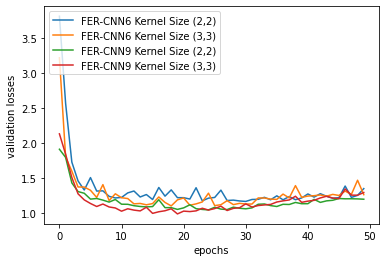

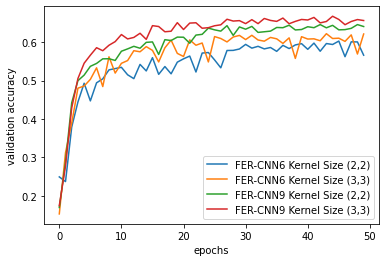

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist_dropoutf.history['val_loss'][:50], label='FER-CNN6 Kernel Size (2,2)')
plt.plot(hist_m1.history['val_loss'], label='FER-CNN6 Kernel Size (3,3)')
plt.plot(hist_m2.history['val_loss'], label='FER-CNN9 Kernel Size (2,2)')
plt.plot(hist_m3.history['val_loss'], label='FER-CNN9 Kernel Size (3,3)')

plt.legend(loc="upper left")
plt.xlabel("epochs")
plt.ylabel("validation losses")
plt.show()

plt.clf()
plt.plot(hist_dropoutf.history['val_accuracy'][:50], label='FER-CNN6 Kernel Size (2,2)')
plt.plot(hist_m1.history['val_accuracy'], label='FER-CNN6 Kernel Size (3,3)')
plt.plot(hist_m2.history['val_accuracy'], label='FER-CNN9 Kernel Size (2,2)')
plt.plot(hist_m3.history['val_accuracy'], label='FER-CNN9 Kernel Size (3,3)')
plt.legend(loc="lower right")
plt.xlabel("epochs")
plt.ylabel("validation accuracy")
plt.show()

## Test number of filters and number of neurons

In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from keras import layers

model_m4 = Sequential()
model_m4.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=(48,48,1)))
model_m4.add(BatchNormalization())
model_m4.add(MaxPooling2D(pool_size=2))
model_m4.add(Dropout(0.35))
model_m4.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model_m4.add(BatchNormalization())
model_m4.add(MaxPooling2D(pool_size=2))
model_m4.add(Dropout(0.35))
model_m4.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model_m4.add(BatchNormalization())
model_m4.add(MaxPooling2D(pool_size=2))
model_m4.add(Dropout(0.35))
model_m4.add(Flatten())
model_m4.add(Dense(512,activation='relu'))
model_m4.add(BatchNormalization())
model_m4.add(Dropout(0.35))
model_m4.add(Dense(1024,activation='relu'))
model_m4.add(BatchNormalization())
model_m4.add(Dropout(0.35))
model_m4.add(Dense(7,activation='softmax'))

In [ ]:
model_m4.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
from keras.callbacks import ModelCheckpoint

epoch = 50

checkpointer_m4 = ModelCheckpoint(filepath='m4.hdf5',verbose=1,save_best_only= True)

hist_m4 = model_m4.fit(tr_inputs, tr_targets , 
          validation_data=(t_inputs , t_targets),
          epochs=epoch, batch_size=128, callbacks=[checkpointer_m4], verbose=1)

Epoch 1/50
223/225 [============================>.] - ETA: 0s - loss: 2.1230 - accuracy: 0.2693
Epoch 00001: val_loss improved from inf to 4.54363, saving model to m4.hdf5
225/225 [==============================] - 7s 31ms/step - loss: 2.1212 - accuracy: 0.2695 - val_loss: 4.5436 - val_accuracy: 0.2424
Epoch 2/50
223/225 [============================>.] - ETA: 0s - loss: 1.6614 - accuracy: 0.3858
Epoch 00002: val_loss improved from 4.54363 to 3.98323, saving model to m4.hdf5
225/225 [==============================] - 7s 31ms/step - loss: 1.6610 - accuracy: 0.3859 - val_loss: 3.9832 - val_accuracy: 0.1789
Epoch 3/50
223/225 [============================>.] - ETA: 0s - loss: 1.4301 - accuracy: 0.4568
Epoch 00003: val_loss improved from 3.98323 to 1.53498, saving model to m4.hdf5
225/225 [==============================] - 7s 31ms/step - loss: 1.4295 - accuracy: 0.4568 - val_loss: 1.5350 - val_accuracy: 0.4110
Epoch 4/50
223/225 [============================>.] - ETA: 0s - loss: 1.3184 - a

In [ ]:
loaded = load_model("m4.hdf5")
scores = loaded.evaluate(t_inputs, t_targets)
print(scores[1])

113/113 [==============================] - 1s 5ms/step - loss: 1.1201 - accuracy: 0.6283
0.6283087134361267


In [ ]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from keras import layers

model_m5 = Sequential()

model_m5.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=(48,48,1)))
model_m5.add(BatchNormalization())
model_m5.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=(48,48,1)))
model_m5.add(BatchNormalization())
model_m5.add(MaxPooling2D(pool_size=2))
model_m5.add(Dropout(0.35))
model_m5.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model_m5.add(BatchNormalization())
model_m5.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model_m5.add(BatchNormalization())
model_m5.add(MaxPooling2D(pool_size=2))
model_m5.add(Dropout(0.35))
model_m5.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model_m5.add(BatchNormalization())
model_m5.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model_m5.add(BatchNormalization())
model_m5.add(MaxPooling2D(pool_size=2))
model_m5.add(Dropout(0.35))
model_m5.add(Flatten())
model_m5.add(Dense(512,activation='relu'))
model_m5.add(BatchNormalization())
model_m5.add(Dropout(0.35))
model_m5.add(Dense(1024,activation='relu'))
model_m5.add(BatchNormalization())
model_m5.add(Dropout(0.35))
model_m5.add(Dense(7,activation='softmax'))

In [ ]:
model_m5.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_m5.summary()

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_173 (Conv2D)          (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_101 (Bat (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_174 (Conv2D)          (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization_102 (Bat (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_155 (MaxPoolin (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_213 (Dropout)        (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_175 (Conv2D)          (None, 24, 24, 128)     

In [ ]:
from keras.callbacks import ModelCheckpoint

epoch = 50

checkpointer_m5 = ModelCheckpoint(filepath='m5.hdf5',verbose=1,save_best_only= True)

hist_m5 = model_m5.fit(tr_inputs, tr_targets , 
          validation_data=(t_inputs , t_targets),
          epochs=epoch, batch_size=128, callbacks=[checkpointer_m5], verbose=1)

Epoch 1/50
  2/225 [..............................] - ETA: 8s - loss: 2.9334 - accuracy: 0.1719

225/225 [==============================] - ETA: 0s - loss: 2.0238 - accuracy: 0.3077
Epoch 00001: val_loss improved from inf to 1.85764, saving model to m5.hdf5
225/225 [==============================] - 16s 70ms/step - loss: 2.0238 - accuracy: 0.3077 - val_loss: 1.8576 - val_accuracy: 0.2474
Epoch 2/50
224/225 [============================>.] - ETA: 0s - loss: 1.5226 - accuracy: 0.4318
Epoch 00002: val_loss did not improve from 1.85764
225/225 [==============================] - 16s 69ms/step - loss: 1.5224 - accuracy: 0.4318 - val_loss: 1.8775 - val_accuracy: 0.2614
Epoch 3/50
224/225 [============================>.] - ETA: 0s - loss: 1.3110 - accuracy: 0.5075
Epoch 00003: val_loss improved from 1.85764 to 1.40030, saving model to m5.hdf5
225/225 [==============================] - 16s 71ms/step - loss: 1.3111 - accuracy: 0.5074 - val_loss: 1.4003 - val_accuracy: 0.4776
Epoch 4/50
224/225 [============================>.] - ETA: 0s - loss: 1.1845 - accuracy: 0.5538
Epoch 00004: val_loss

In [ ]:
loaded = load_model("m5.hdf5")
scores = loaded.evaluate(t_inputs, t_targets)
print(scores[1])

113/113 [==============================] - 1s 7ms/step - loss: 1.0650 - accuracy: 0.6225
0.6224575042724609


#Do something with the best model.

In [1]:
# upload best model 
from google.colab import files
uploaded = files.upload()

Saving bestCNN.hdf5 to bestCNN.hdf5


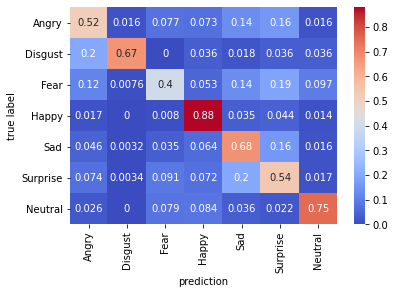

In [17]:
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn

loaded = load_model("bestCNN.hdf5")
res = loaded.predict(t_inputs)
emotion_dict = {0: 'Angry', 1:'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6:'Neutral'}
label = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
y_true = []
for t in t_targets:
  y_true.append(emotion_dict[np.argmax(t)])
y_pred = []
for t in res:
  ind = np.argmax(t)
  y_pred.append(emotion_dict[ind])

# make heatmap
cm = metrics.confusion_matrix(y_true, y_pred)
cm.dtype = np.float64
for i in range(len(cm)):
  s = np.sum(cm[i])
  cm[i] = cm[i] / s
df_cm = pd.DataFrame(cm, index=label, columns=label)
seaborn.heatmap(df_cm, annot=True, cmap='coolwarm')
plt.xlabel("prediction")
plt.ylabel("true label")
plt.show()

In [19]:
report = metrics.classification_report(y_true, y_pred, target_names=label)
print(report)

              precision    recall  f1-score   support

       Angry       0.60      0.52      0.56       491
     Disgust       0.70      0.67      0.69        55
        Fear       0.58      0.40      0.47       528
       Happy       0.81      0.88      0.84       879
         Sad       0.58      0.68      0.62       626
    Surprise       0.49      0.54      0.52       594
     Neutral       0.77      0.75      0.76       416

    accuracy                           0.65      3589
   macro avg       0.65      0.63      0.64      3589
weighted avg       0.65      0.65      0.65      3589

